# AtoZ Leftovers

Last December, [WXPN](http://www.xpn.org/) ran a huge multi-week play list,
[XPN A to Z](http://xpn.org/music-artist/xpn-a-z) playing their catalog alphabetically.
At the time, questions about sorting and such prompted me, among others,
to do some analysis like my [AtoZ](AtoZ.ipynb) notebook.
At the time there was speculation about things like songs that were numbers,
or songs that started with punctuation.
Well, the other day they [announced](http://thekey.xpn.org/2017/04/05/xpnatoz/)
a followup, [A to Z Leftovers](http://xpn.org/music-artist/az-leftovers).

So, let's see what we can learn this time.

In [54]:
%matplotlib inline
from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide();
    } else {
        $('div.input').show();
    }
        code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


## Getting the Data

For starters, we can just screen scrape the [playlist page](http://xpn.org/music-artist/az-leftovers).
Since the list is shorter, it's all inline.

In [66]:

from lxml import html
import requests
import pandas as pd

leftovers = pd.DataFrame(None, columns = ('Title', 'Artist'))
page = requests.get('http://xpn.org/music-artist/az-leftovers')
tree = html.fromstring(page.content)
tracks = tree.xpath('//div[@class="item-page"]//ul/li/text()')
for track in tracks:
    (title, artist) = track.split(' - ', 1)
    leftovers = leftovers.append({'Title': title, 'Artist': artist}, ignore_index=True)



## Data Enrichment

This will improve but for now,
we just pull out the first character or the title as a classifier.

In [67]:
leftovers = leftovers.join(leftovers.apply(lambda x: x[0][0].upper(), axis=1).to_frame('First Character'))

## Examining the data

Let's look at a few rows and get soe stats,
just so we know we're working ok.

In [68]:
HTML(leftovers.head(5).to_html())

,Title,Artist,First Character
0,#1 Crush,Garbage,#
1,#1 Hit Song,Minutemen,#
2,#34,Dave Matthews Band,#
3,#41,Dave Matthews Band,#
4,#9 Dream,John Lennon,#


In [69]:
HTML(leftovers.describe().to_html())

,Title,Artist,First Character
count,73,73,73
unique,70,69,4
top,#9 Dream,Elvis Costello,(
freq,3,2,40


## First Characters of Titles

That these are non-alphabetic is how we got here.
At this point, on Saturday morning, the list has been pretty parenthesis heavy.
(At least it was until I started working on this bit.)
So, it's not clear yet how to best look a this,
but we'll take a swing at it.

First, just bucket by first character.

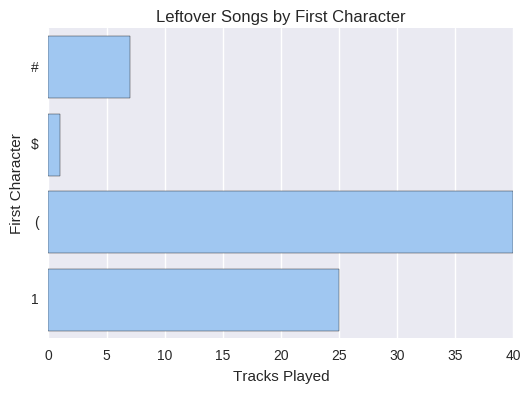

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(6, 4))
sns.set_color_codes('pastel')
sns.countplot(y='First Character', data=leftovers, color='b')
ax.set(xlabel="Tracks Played")
ax.set_title('Leftover Songs by First Character')

Then breakdown the parentheticals by first word.
Honestly, I'm not sure it's all that interesting.

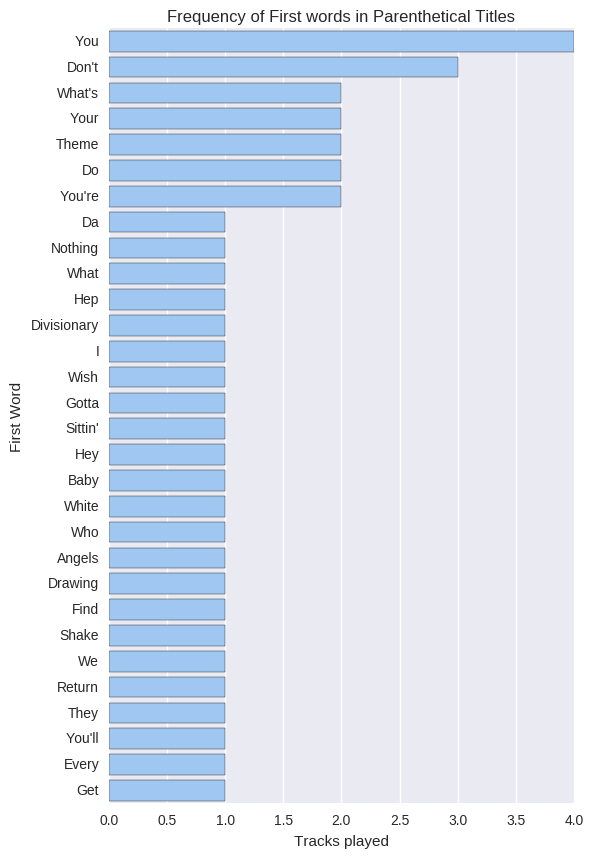

In [71]:
paran_words = leftovers[leftovers['Title'].str.startswith('(')]['Title'].str.extract('([\w\']+)').value_counts()
paran_word_freq = pd.DataFrame(zip(paran_words.keys().tolist(), paran_words.tolist()),
                               columns=('First Word', 'Count'))
f, ax = plt.subplots(figsize=(6, 10))
sns.barplot(y='First Word', x='Count', data=paran_word_freq,
           orient='h', color='b')
ax.set(xlabel='Tracks played')
ax.set_title('Frequency of First words in Parenthetical Titles')
                               


##  Breakdown by Artist

In the original playlist, the Beatles dominated the counts.
But in the leftovers, not so much.

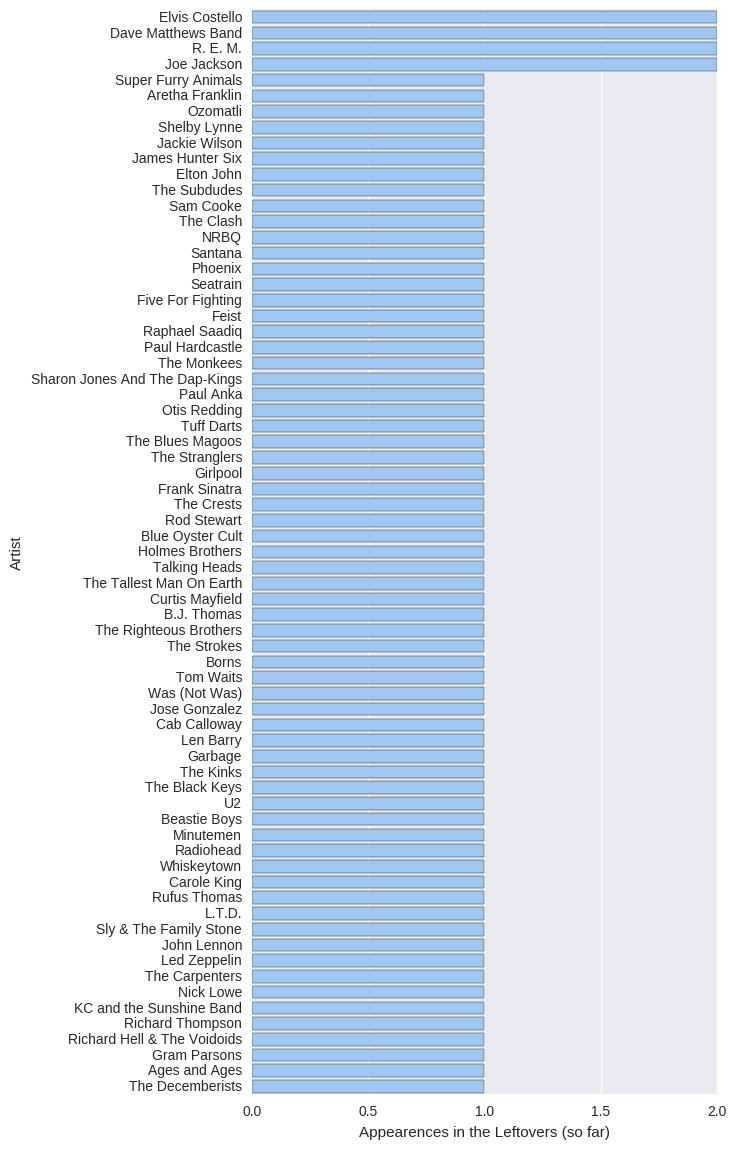

In [72]:
c = leftovers['Artist'].value_counts()
artists = pd.DataFrame(zip(c.keys().tolist(), c.tolist()),
                       columns=('Artist', 'count'))
f, ax = plt.subplots(figsize=(6, 14))
sns.set_color_codes('pastel')
sns.barplot(y='Artist', x='count', data=artists, color='b')
ax.set(xlabel="Appearences in the Leftovers (so far)")